In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import h5py as h5
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Embedding, Dropout, Activation, Reshape
#from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, GlobalAveragePooling1D, TimeDistributed
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
#Over-sampling: SMOTE
#SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, 
#based on those that already exist. It works randomly picking a point from the minority class and computing 
#the k-nearest neighbors for this point.The synthetic points are added between the chosen point and its neighbors.
#We'll use ratio='minority' to resample the minority class.
# smote = SMOTE('minority')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#dataset = pd.read_csv('sample_data/data_CKD_MI.csv')

In [ ]:
dataset = pd.read_csv('sample_data/data_CKD_bigdata_refined.csv')


In [ ]:
dataset.head()

,sex,age,sido,height,weight,waist,vision_left,vision_right,listen_left,listen_right,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_RSPS_CD,DRINK_OR_NOT,MOUTH_CHECK,BMI,GFR,stage
0,1.0,8.0,43.0,170.0,75.0,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,92.0,48.0,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,1.0,25.951557,86.886038,2
1,1.0,7.0,11.0,180.0,80.0,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,121.0,55.0,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,1.0,24.691358,100.644197,1
2,1.0,9.0,41.0,165.0,75.0,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,104.0,41.0,74.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0,0.0,27.548209,95.928640,1
3,1.0,11.0,48.0,175.0,80.0,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,106.0,76.0,104.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0.0,1.0,26.122449,73.203730,2
4,1.0,11.0,30.0,165.0,60.0,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,104.0,61.0,117.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0.0,1.0,22.038567,105.714492,1


In [ ]:
dataset.shape

(1000000, 29)

In [ ]:
#dataset.isnull().sum()

In [ ]:
#dataset.iloc[:,-1]
classes = {1:0, 2:1, 3:2, 4:3, 5:4}
dataset['stage']=dataset['stage'].replace(to_replace=classes)

In [ ]:
# Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
oversample = RandomOverSampler(random_state=42)
#undersample = RandomUnderSampler(sampling_strategy='majority')
X_over, y_over = oversample.fit_resample(X, y)
#X_over,y_over = undersample.fit_resample(X, y)
#X_over,y_over = undersample.fit_resample(X_over,y_over)
#X_over,y_over = undersample.fit_resample(X_over,y_over)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Counter(y)

Counter({0: 475386, 1: 486184, 2: 36377, 3: 1026, 4: 1027})

In [ ]:
Counter(y_over)

Counter({0: 486184, 1: 486184, 2: 486184, 3: 486184, 4: 486184})

In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X_over,y_over, test_size=0.2, random_state = 2)

In [ ]:
X_train.shape

(1944736, 28)

In [ ]:
from tensorflow import keras

In [ ]:
model = Sequential()
model.add(keras.layers.Dense (15,input_shape=(X_train.shape[1],),activation='relu')) #input layer
model.add(keras.layers.Dense (10,activation='relu')) #hidden
model.add(keras.layers.Dense (5,activation='softmax')) #output

In [ ]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
r=model.fit(X_train,y_train,epochs=100,validation_data=(X_test, y_test))

Epoch 1/100
60773/60773 [==============================] - 95s 2ms/step - loss: 0.1672 - accuracy: 0.9455 - val_loss: 0.1042 - val_accuracy: 0.9751
Epoch 2/100
60773/60773 [==============================] - 96s 2ms/step - loss: 0.1139 - accuracy: 0.9677 - val_loss: 0.1848 - val_accuracy: 0.9475
Epoch 3/100
60773/60773 [==============================] - 96s 2ms/step - loss: 0.1210 - accuracy: 0.9661 - val_loss: 0.0767 - val_accuracy: 0.9786
Epoch 4/100
60773/60773 [==============================] - 88s 1ms/step - loss: 0.1165 - accuracy: 0.9690 - val_loss: 0.1025 - val_accuracy: 0.9669
Epoch 5/100
60773/60773 [==============================] - 96s 2ms/step - loss: 0.1194 - accuracy: 0.9700 - val_loss: 0.1192 - val_accuracy: 0.9745
Epoch 6/100
60773/60773 [==============================] - 96s 2ms/step - loss: 0.1349 - accuracy: 0.9698 - val_loss: 0.1130 - val_accuracy: 0.9777
Epoch 7/100
60773/60773 [==============================] - 95s 2ms/step - loss: 0.1628 - accuracy: 0.9697 - val_

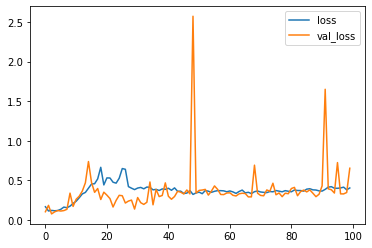

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
mat = confusion_matrix(y_test,y_classes)
mat

array([[96131,  1123,     2,     0,     0],
       [  923, 95142,  1208,     0,     0],
       [    0,   228, 96618,   503,     4],
       [    0,     0,     0, 97274,     0],
       [ 2086,  1999,     0,  3931, 89012]])

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_classes, target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5']))


Classification Report

              precision    recall  f1-score   support

     Class 1       0.97      0.99      0.98     97256
     Class 2       0.97      0.98      0.97     97273
     Class 3       0.99      0.99      0.99     97353
     Class 4       0.96      1.00      0.98     97274
     Class 5       1.00      0.92      0.96     97028

    accuracy                           0.98    486184
   macro avg       0.98      0.98      0.98    486184
weighted avg       0.98      0.98      0.98    486184

